# Phân tích kết quả

In [1]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/


# Author: Bùi Tiến Thành (@bu1th4nh)
# Date: 2022/12/26 14:13 
# CTTN Toán tin K64

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import re
import ujson as json
import os
import ot
# import pandas_profiling as pp
from dtaidistance import dtw

In [35]:
filename = "/home/thanh10973/TALENTED-K64MI/MI4050/Project/LIFE_live/model/2023_03_07_13_34_55/Loss_log_MAPE_PDTW0.1_3_0.2.csv"
truename = filename[filename.find("Loss_log_") + len("Loss_log_"):-4]
print(truename)

MAPE_PDTW0.1_3_0.2


In [36]:
Ariel = pd.read_csv(filename)
Ariel = Ariel.drop(columns=['Unnamed: 0'])

In [37]:
print("Max time: ", Ariel.describe().loc['max', 'time'], "sec")

print("Min stats:")
display(Ariel.describe().loc[['min']])

print("Final row:")
display(pd.DataFrame(Ariel.iloc[-1].values.reshape(1, -1), columns=Ariel.columns))

Max time:  0.0170259666666666 sec
Min stats:


,loss,MAPE_train,MAPE_test,MAPE_min_train,MAPE_min_test,time
min,80.280685,15.757294,4.384049,15.757294,4.384049,0.00231


Final row:


,loss,MAPE_train,MAPE_test,MAPE_min_train,MAPE_min_test,time
0,94.685,26.679414,5.642204,15.757294,4.384049,0.002719


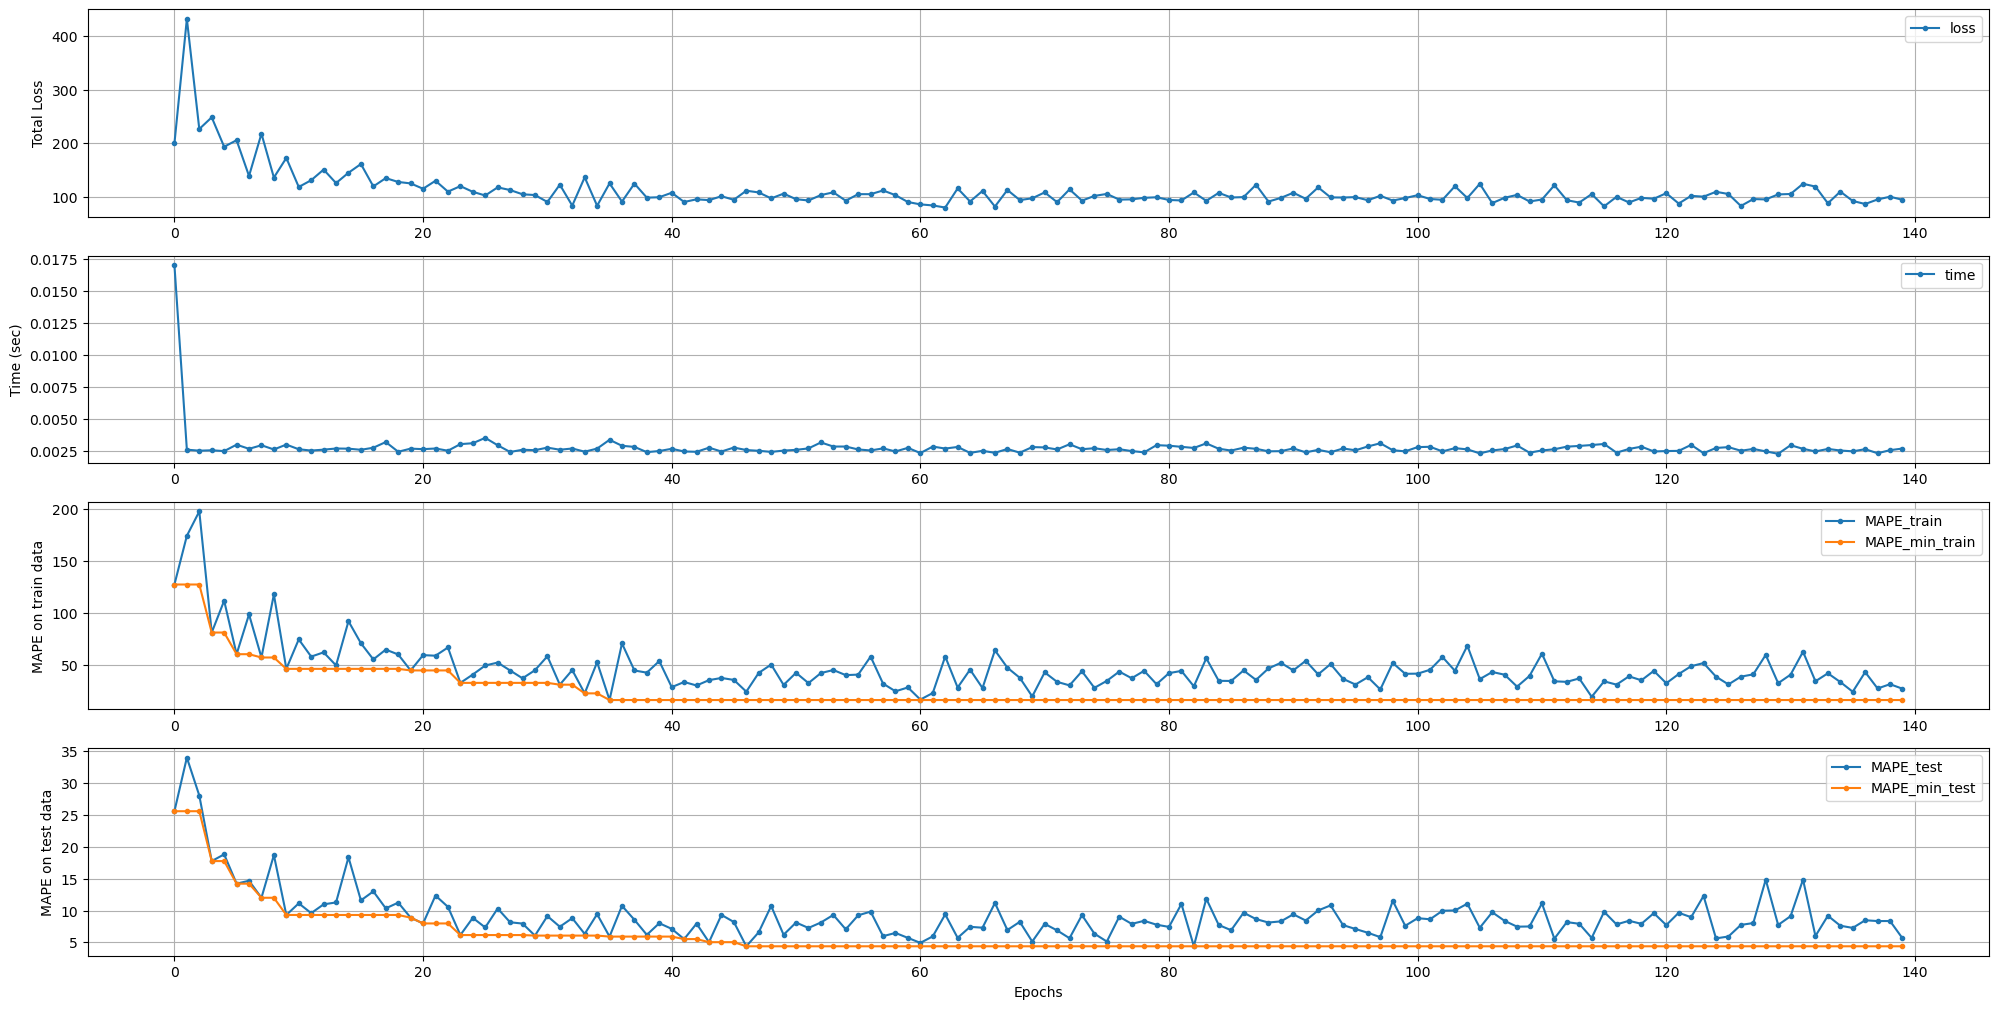

In [38]:
metric = None;
if(filename.find("MSE") != -1):
    metric = "MSE"
elif(filename.find("MAE") != -1):
    metric = "MAE"
elif(filename.find("MAPE") != -1):
    metric = "MAPE"

fig, ax = plt.subplots(ncols=1, nrows=4 ,figsize=(20, 10))
Ariel.plot(y = Ariel.columns[0], subplots=True, style='.-', grid=True, ax = ax[0], ylabel='Total Loss');
Ariel.plot(y = Ariel.columns[-1], subplots=True, style='.-', grid=True, ax = ax[1], ylabel='Time (sec)');
Ariel.plot(y = [Ariel.columns[1], Ariel.columns[3]], subplots=False, style='.-', grid=True, ax = ax[2], ylabel=metric + " on train data");
Ariel.plot(y = [Ariel.columns[2], Ariel.columns[4]], subplots=False, style='.-', grid=True, ax = ax[3], ylabel=metric + " on test data");
plt.tight_layout()
plt.xlabel('Epochs')
plt.show()
fig.savefig(f'{truename}.pdf', bbox_inches='tight')

## Data MSE/MAE

In [39]:
Belle = pd.read_parquet("../DataWater_train_cleansed_phase3.parquet")

# Train
Train = Belle[:int(len(Belle)//5*4)]
Train_mean = Train.mean();
Train_std  = Train.std();

# Test
Test  = Belle[int(len(Belle)//5*4):]
Test_mean = Test.mean();
Test_std  = Test.std();


print('Final row')
FR = Ariel.iloc[-1, 1:-1];


Cinderella = pd.DataFrame(columns=Belle.columns);
for col in Belle.columns:
    for row in Ariel.columns[1:-1]:
        if(row.find("train") != -1):
            Cinderella.loc[row, col] = FR[row] * Train_std[col] + Train_mean[col]
        elif(row.find("test") != -1):
            Cinderella.loc[row, col] = FR[row] * Test_std[col] + Test_mean[col]
    
display(Cinderella)



Final row


,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
MAPE_train,54.775349,498078.409924,60.741831,3276.899026,17.809241,558.645816,91.656807,6582.202767,125.414256,59.33436
MAPE_test,19.345637,137032.473218,17.852203,309.808695,6.439821,164.444506,33.972974,2424.24135,53.425072,36.188776
MAPE_min_train,35.299671,304696.398123,38.275615,1974.585391,11.992665,359.890561,61.784144,4024.898896,85.333724,47.281253
MAPE_min_test,16.835437,110760.207367,15.21901,272.949698,5.807582,144.414054,30.57425,1993.198212,47.723998,34.785135
